## Excercise 1

In [198]:
import numpy as np
import matplotlib . pyplot as plt
import random
import pandas as pd

In [199]:
def get_column(data: pd.DataFrame, index):
    return data.iloc[:,index]

def prepare_data(path_data, num_cols):
    
    data = pd.read_csv(path_data)
    X = []
    y = data.iloc[:,-1]
    for i in range(num_cols):
        X.append(get_column(data, i))

    return X, y

X , y = prepare_data ('./advertising.csv', 3)
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(np.shape(X))

(3, 200)


## Ex2: kỹ thuật huấn luyện data dùng (one sample - linear regression):

In [200]:
import numpy as np

def normalize(X):
    return (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

def initialize_params():
    w1, w2, w3, b = (0.016992259082509283,
                     0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def update_parameters(x, w, y, y_hat, b, lr):
    derivative_w = x * 2 * (y_hat - y)
    derivative_b = 2 * (y_hat - y)

    w = w - (lr * derivative_w)
    b = b - (lr * derivative_b)
    return w, b

def predict(x, w, b):
    return np.dot(w, x) + b

def compute_loss(y, y_hat):
    loss = (y - y_hat)**2
    return loss

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    # # Chuẩn hóa dữ liệu đầu vào
    # X_data = normalize(X_data)

    w1, w2, w3, b = initialize_params()
    N = np.shape(X_data)[1]     
    w = np.array([w1, w2, w3])
    losses = []

    # Vòng lặp qua từng sample
    for i in range(N):
        x = X_data[:, i]
        y = y_data[i]
        y_hat = predict(x, w, b)
            # Tính loss cho sample hiện tại
        loss = compute_loss(y, y_hat)
        w, b = update_parameters(x, w, y, y_hat, b, lr)
        losses.append(loss)

    return w, b, losses


In [201]:
w, b, losses = implement_linear_regression(np.array(X), np.array(y))
print(w, b)

[0.07562837 0.11137259 0.04211573] 0.004213169669934351


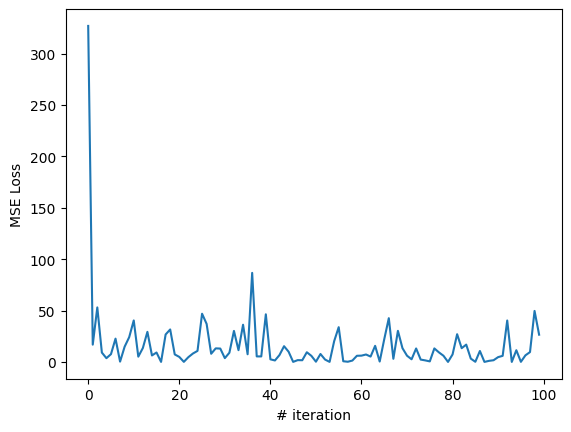

In [202]:
plt.plot(losses[:100])
plt.xlabel("# iteration")
plt.ylabel("MSE Loss")
plt.show()

In [203]:
import numpy as np

# Mảng x và w
x = np.array([1, 1, 1])  # Biến đầu vào
w = np.array([0, 0.5, 0])  # Trọng số
b = 0.5  # Bias

# Tính ŷ
y_hat = np.dot(w, x) + b
print("Giá trị dự đoán ŷ:", y_hat)

Giá trị dự đoán ŷ: 1.0


In [204]:
# Giá trị dự đoán và thực tế
y_hat = 1
y = 0.5

# Tính loss (MSE)
loss = compute_loss(y_hat, y)
print("Giá trị MSE (loss):", loss)

Giá trị MSE (loss): 0.25


In [205]:
def compute_gradient_wi(xi, y, y_hat):
    return -2 * (y - y_hat) * xi

xi = 1.0
y = 1.0
y_hat = 0.5

g_wi = compute_gradient_wi(xi, y, y_hat)
print("Giá trị của g_wi:", g_wi)

Giá trị của g_wi: -1.0


In [206]:
def compute_gradient_b(y, y_hat):
    return -2 * (y - y_hat)

y = 2.0
y_hat = 0.5

b = compute_gradient_b(y, y_hat)
print("Giá trị của b:", b)

Giá trị của b: -3.0


In [207]:
def update_weight_wi(wi, dl_dwi, lr):
    return wi - (lr * dl_dwi)


# Giá trị cho trước
wi = 1.0
dl_dwi = -0.5
lr = 1e-5

# Tính after_wi
after_wi = update_weight_wi(wi, dl_dwi, lr)
print("Giá trị của after_wi:", after_wi)

Giá trị của after_wi: 1.000005


In [208]:
def update_weight_b(b, dl_db, lr):
    return b - (lr * dl_db)


# Giá trị cho trước
b = 0.5
dl_db = -1.0
lr = 1e-5

# Tính after_b
b = update_weight_b(b, dl_db, lr)
print("Giá trị của after_b:", b)

Giá trị của after_b: 0.50001


In [209]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data('advertising.csv', 3)
w, b, losses = implement_linear_regression(np.array(X), np.array(y))
sales = predict(np.array([tv, radio, newspaper]), w, b)
print (f'predicted sales is {sales}')

predicted sales is 7.615090886835145


In [210]:
def compute_loss_mae(y_hat, y):
    return abs(y - y_hat)


l = compute_loss_mae(y_hat=1, y=0.5)
print(f"Mean Absolute Error: {l}")

Mean Absolute Error: 0.5
